In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import os
import cv2
import matplotlib.image as mpimg

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/images'
classes = os.listdir(path)
classes

['00000229.jpg',
 '00000025.jpg',
 'License (1003).png',
 '00000043.jpg',
 '00000015.jpg',
 '00000185.jpg',
 '00000001.jpg',
 '00000028.jpg',
 '00000032.jpg',
 '00000213.jpg',
 '00000026.jpg',
 '00000197.jpg',
 '00000285.jpg',
 '00000373.jpg',
 '00000119.jpg',
 '00000436.jpg',
 'License (1027).png',
 '00000241.jpg',
 '00000019.jpg',
 '00000238.jpg',
 '00000282.jpg',
 '00000066.jpg',
 '00000300.jpg',
 'License (1031).png',
 '00000426.jpg',
 '00000104.jpg',
 '00000369.jpg',
 'License (104).png',
 'License (1011).png',
 '00000251.jpg',
 '00000231.jpg',
 '00000123.jpg',
 '00000158.jpg',
 '00000102.jpg',
 '00000248.jpg',
 '00000089.jpg',
 '00000146.jpg',
 '00000318.jpg',
 '00000289.jpg',
 'License (1018).png',
 'License (1010).png',
 'License (1001).png',
 '00000053.jpg',
 '00000062.jpg',
 '00000011.jpg',
 '00000161.jpg',
 '00000250.jpg',
 '00000340.jpg',
 '00000393.jpg',
 '00000018.jpg',
 '00000237.jpg',
 '00000338.jpg',
 '00000206.jpg',
 '00000017.jpg',
 'License (1013).png',
 '00000327.j

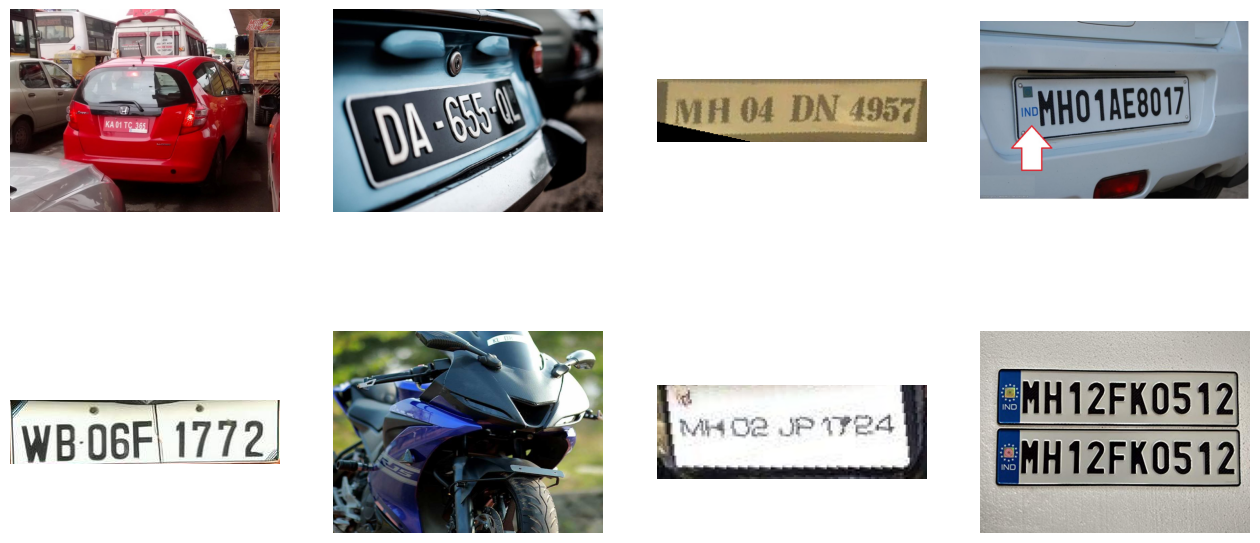

In [4]:
#Data Visualization

fig = plt.gcf()
fig.set_size_inches(16, 16)

lic_dir = os.path.join('/content/drive/MyDrive/images')
lic_names = os.listdir(lic_dir)

pic_index = 190

lic_images = [os.path.join(lic_dir, fname)
              for fname in lic_names[pic_index-8:pic_index]]

for i, img_path in enumerate(lic_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [5]:
img_path = '/content/drive/MyDrive/images/00000010.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (200, 200))
img = img / 255.0  # Normalize to [0, 1]
img_input = np.expand_dims(img, axis=0)  # Shape: (1, 200, 200, 3)

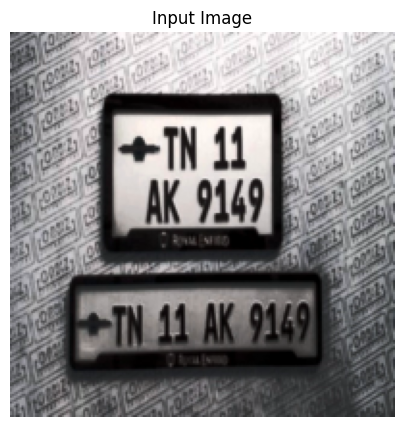

In [6]:
#Display the image
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()

In [7]:
import cv2

def enhance_image(image_path):
    # Read image
    image = cv2.imread('/content/drive/MyDrive/images/00000010.jpg')
    if image is None:
        raise ValueError(f"Image not found at {'/content/drive/MyDrive/images/00000010.jpg'}")

    # Resize
    image = cv2.resize(image, (640, 640))

    # Convert to HSV and enhance brightness
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])  # histogram equalization
    image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # Denoise
    image = cv2.GaussianBlur(image, (3,3), 0)
    return image

enhanced = enhance_image('/content/drive/MyDrive/images/00000010.jpg')

cv2.imwrite('/content/drive/MyDrive/images/00000010.jpg', enhanced)


True

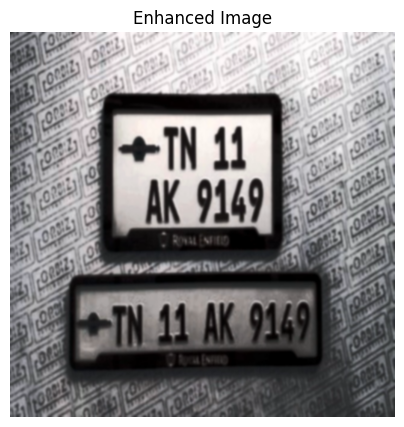

In [8]:
#Display the image
plt.figure(figsize=(5, 5))
plt.imshow(enhanced)
plt.axis('off')
plt.title("Enhanced Image")
plt.show()

In [9]:
from PIL import Image, ExifTags

def fix_orientation(image_path, save_path=None, target_orientation="landscape"):
    # Try to read EXIF metadata first
    try:
        img_pil = Image.open(image_path)
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break
        exif = img_pil._getexif()
        if exif is not None and orientation in exif:
            if exif[orientation] == 3:   # Upside down
                img_pil = img_pil.rotate(180, expand=True)
            elif exif[orientation] == 6: # Rotated right
                img_pil = img_pil.rotate(270, expand=True)
            elif exif[orientation] == 8: # Rotated left
                img_pil = img_pil.rotate(90, expand=True)
            img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
        else:
            img = cv2.imread(image_path)
    except:
        img = cv2.imread(image_path)

    if img is None:
        raise ValueError(f"Image not found: {image_path}")

    # Fallback: check aspect ratio if EXIF missing
    h, w = img.shape[:2]
    if target_orientation == "landscape" and h > w:
        # Rotate 90° to make landscape
        img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    elif target_orientation == "portrait" and w > h:
        # Rotate 90° to make portrait
        img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

    # Save or return
    if save_path:
        cv2.imwrite(save_path, img)
        print(f"[INFO] Fixed orientation saved: {save_path}")
    return img

[INFO] Fixed orientation saved: /content/drive/MyDrive/images/License (1005)_fixed.png


array([[[ 59,  61,  61],
        [118, 120, 120],
        [100, 102, 102],
        ...,
        [107, 112, 111],
        [107, 112, 111],
        [107, 112, 111]],

       [[ 61,  63,  63],
        [123, 125, 125],
        [106, 108, 108],
        ...,
        [112, 117, 116],
        [112, 117, 116],
        [113, 118, 117]],

       [[ 62,  64,  64],
        [126, 128, 128],
        [110, 112, 112],
        ...,
        [117, 122, 121],
        [117, 122, 121],
        [117, 122, 121]],

       ...,

       [[ 35,  35,  35],
        [ 37,  37,  37],
        [ 22,  22,  22],
        ...,
        [ 24,  25,  23],
        [ 23,  24,  22],
        [ 23,  24,  22]],

       [[ 20,  20,  20],
        [ 37,  37,  37],
        [ 36,  36,  36],
        ...,
        [ 16,  17,  15],
        [ 15,  16,  14],
        [ 14,  15,  13]],

       [[ 11,  11,  11],
        [ 17,  17,  17],
        [ 29,  29,  29],
        ...,
        [ 22,  23,  21],
        [ 26,  24,  23],
        [ 26,  27,  25]]], dtype=uint8)
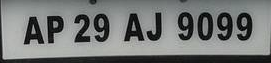

In [10]:

fix_orientation(
    "/content/drive/MyDrive/images/License (1005).png",
    save_path="/content/drive/MyDrive/images/License (1005)_fixed.png",
    target_orientation="landscape"
)


In [11]:
#eda

In [12]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.image as mpimg
import random

# Path to dataset (update if needed)
data_path = "/content/drive/MyDrive/images"

# Get only image files
image_files = [f for f in os.listdir(data_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print("Total Images:", len(image_files))
print("Sample Files:", image_files[:10])


Total Images: 375
Sample Files: ['00000229.jpg', '00000025.jpg', 'License (1003).png', '00000043.jpg', '00000015.jpg', '00000185.jpg', '00000001.jpg', '00000028.jpg', '00000032.jpg', '00000213.jpg']


In [13]:
heights, widths, channels = [], [], []

for img_name in image_files:
    img_path = os.path.join(data_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        h, w, c = img.shape
        heights.append(h)
        widths.append(w)
        channels.append(c)

print("Average Height:", np.mean(heights))
print("Average Width:", np.mean(widths))
print("Unique Channel Counts (1=Grayscale, 3=RGB):", set(channels))

Average Height: 344.24533333333335
Average Width: 481.33866666666665
Unique Channel Counts (1=Grayscale, 3=RGB): {3}


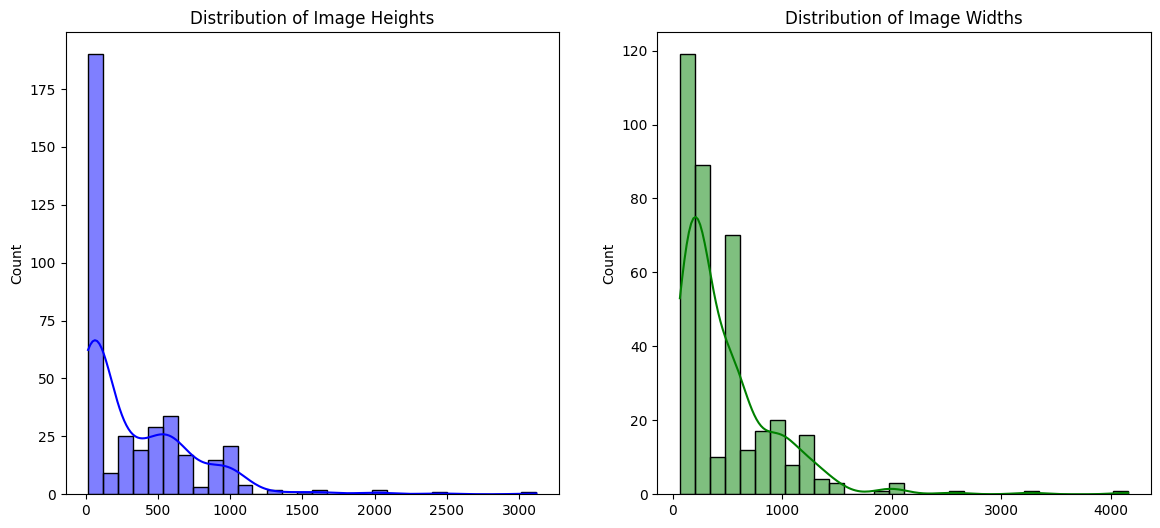

In [14]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(heights, bins=30, kde=True, color="blue")
plt.title("Distribution of Image Heights")

plt.subplot(1,2,2)
sns.histplot(widths, bins=30, kde=True, color="green")
plt.title("Distribution of Image Widths")

plt.show()

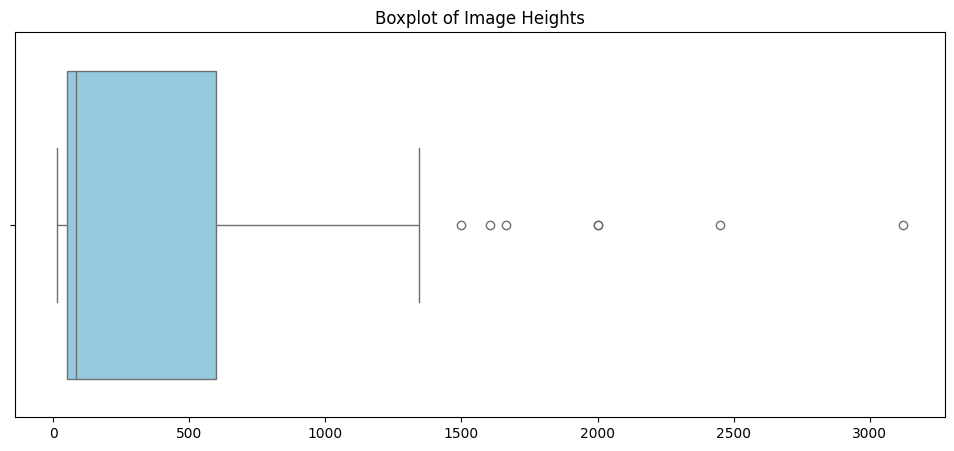

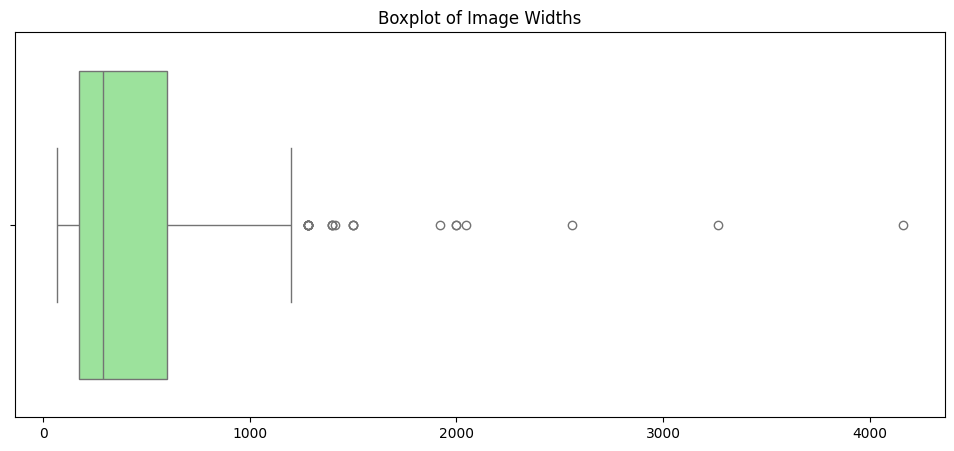

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(x=heights, color="skyblue")
plt.title("Boxplot of Image Heights")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x=widths, color="lightgreen")
plt.title("Boxplot of Image Widths")
plt.show()

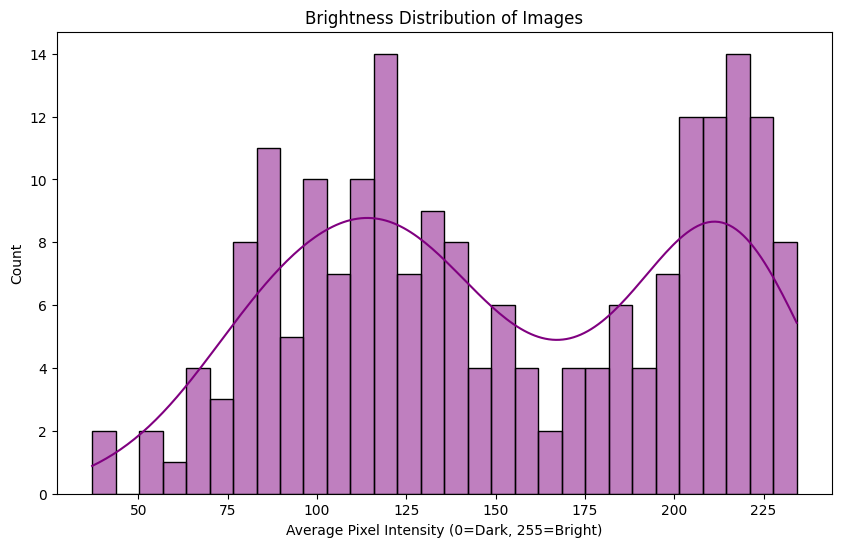

In [16]:
brightness = []
for img_name in image_files[:200]:  # sample 200 images for speed
    img_path = os.path.join(data_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        brightness.append(img.mean())

plt.figure(figsize=(10,6))
sns.histplot(brightness, bins=30, kde=True, color="purple")
plt.title("Brightness Distribution of Images")
plt.xlabel("Average Pixel Intensity (0=Dark, 255=Bright)")
plt.show()

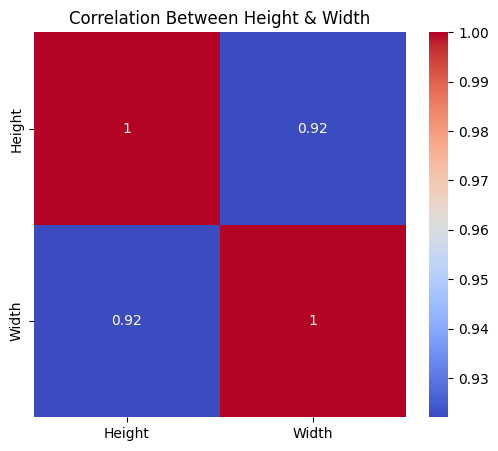

In [17]:
import pandas as pd

df_sizes = pd.DataFrame({"Height": heights, "Width": widths})
plt.figure(figsize=(6,5))
sns.heatmap(df_sizes.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Height & Width")
plt.show()